In [1]:
# room_modes.ipynb
# Eric Graves
# Created 02/07/2020

# Model room modes using acoustical models.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

%matplotlib inline

## Rectangular Room Modes: No Absorption

 Assuming no decay and rigid surfaces --> perfect reflections at all walls 

Nonzero modes: 36
[ 66.21621622  89.90620022  96.98880304 114.47866816 138.48731885
 155.56663559 156.44024352 167.84542693 194.09128065 198.16079326
 206.62445608 222.67634118 230.83173627 240.33390882 252.11344285
 253.72998072 261.88438039 287.87426223 289.22335758 291.10210803
 297.38691102 311.20415486 315.49102601 319.17121835 329.78986294
 341.96050723 343.55097909 360.47274922 365.56687552 376.89281186
 379.36399154 380.44020966 404.01415924 420.95590744 434.87607856
 471.59732998]


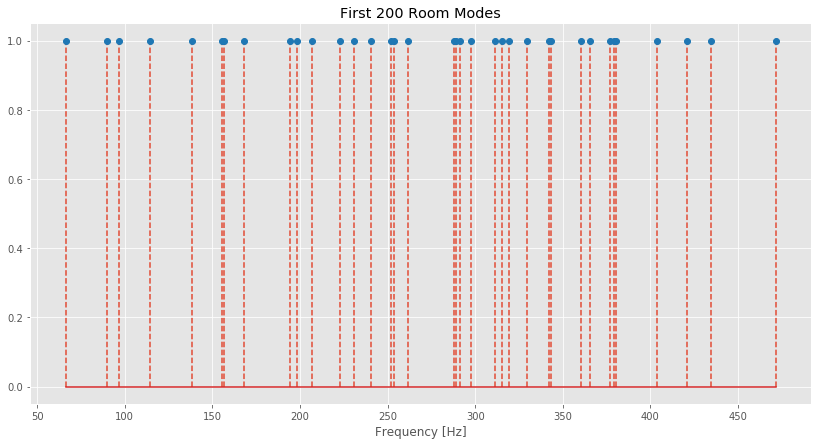

In [9]:
# Setup
c = 343           # Speed of sound in air at STP [m/s]
 
x = 2.59          # Room dimensions [m]
y = 2.42 
z = 2.82 

# Frequency space
f = np.zeros((7,7,7))
unsorted_modes = []
num_modes = 0

for l in range (0, 6):
    for m in range (0, 6):
        for n in range (0,6):
            
            f[(l + 1), (m + 1), (n + 1)] = 0.5*c*sqrt((1/x)*(1/x) + (m/y)*(m/y) + (n/z)*(n/z)) # No decay, perfect reflections
            num_modes += 1
            unsorted_modes.append(f[(l + 1), (m + 1), (n + 1)])
        
    
unique_modes = np.unique(unsorted_modes)
    
sorted_modes = np.sort(unique_modes)     # Sort modes

first_modes = sorted_modes[0:200]          # Only plot the first n(=200) modes

print("Nonzero modes: " + str(np.count_nonzero(first_modes))) # sanity check: all modes should be non-zero

print(first_modes)

with plt.style.context('ggplot'):          # Set style to be like R
    
    plt.figure(figsize=(14,7))
    plt.title('First 200 Room Modes')
    p1 = plt.stem(first_modes, np.ones(len(first_modes)), linefmt='--', use_line_collection=True)
    plt.ylabel('') 
    plt.xlabel('Frequency [Hz]') 

    
    
    # Style stuff below
    font = {'family': 'sans',
           'color':  'black',
           'weight': 'normal',
           'size': 16,
           }

In [ ]:
## Rectangular Room: with absorbing faces
